# KMEANS

## Sklearn algorithm

E:\Python envs\UnsupervisedML_PROJECT\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


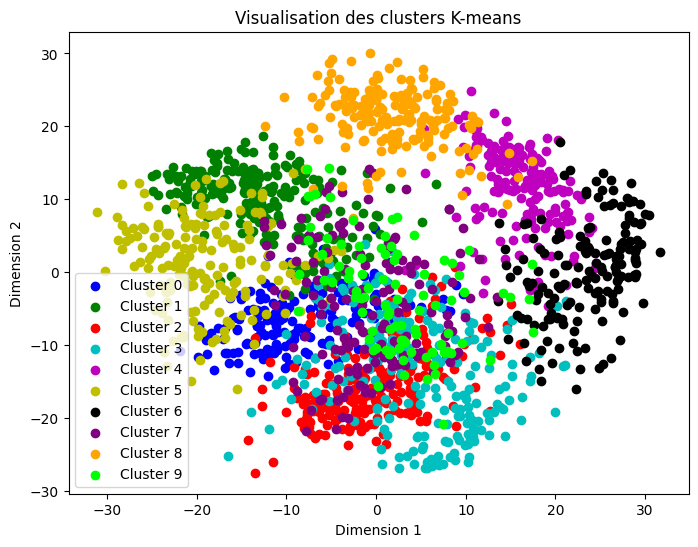

In [259]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA


# Charger l'ensemble de données MNIST (digits)
digits = load_digits()

# Sélectionner un sous-ensemble d'échantillons pour une exécution plus rapide
data_sl = digits.data

# Réduire la dimensionnalité avec PCA pour faciliter l'application de K-means
n_components = 64
pca = PCA(n_components=n_components)
data_pca_sl = pca.fit_transform(data_sl)

# Appliquer K-means sur les données réduites avec PCA
n_clusters_sl = 10
kmeans = KMeans(n_clusters=n_clusters_sl)
kmeans.fit(data_pca_sl)

# Obtenir les centroids et les étiquettes des clusters
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot des données avec les couleurs des clusters
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'lime']

for i in range(n_clusters_sl):
    cluster_data_sl = data_pca_sl[labels == i]
    plt.scatter(cluster_data_sl[:, 0], cluster_data_sl[:, 1], c=colors[i], label=f'Cluster {i}')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Visualisation des clusters K-means')
plt.legend()
plt.show()

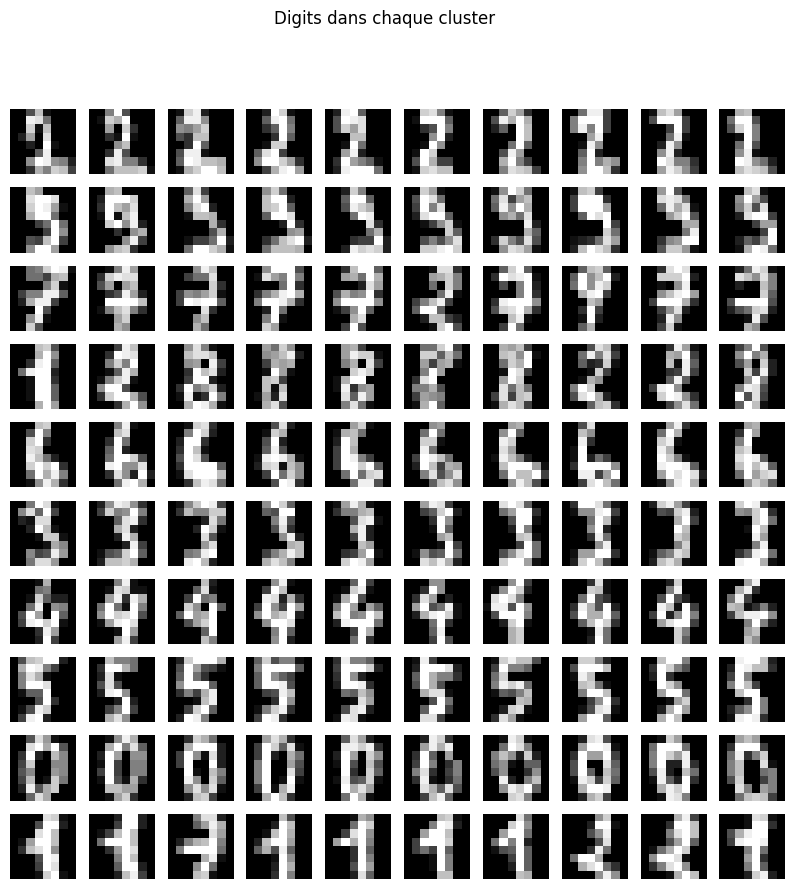

In [260]:
# Afficher les digits pour chaque cluster
fig, axs = plt.subplots(n_clusters_sl, 10, figsize=(10, n_clusters_sl))
fig.suptitle('Digits dans chaque cluster')

for i in range(n_clusters_sl):
    cluster_digits_sl = data_sl[labels == i]
    for j in range(10):
        ax = axs[i, j]
        ax.imshow(cluster_digits_sl[j].reshape(8, 8), cmap='gray')
        ax.axis('off')
plt.show()

## Custom algorithm

In [261]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

In [262]:
dataset = load_digits(n_class=10)
print(len(dataset.data))

1797


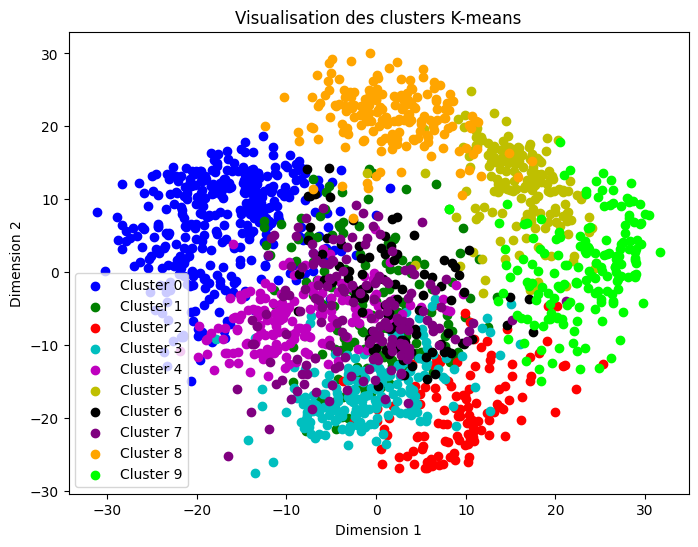

In [263]:
def initialize_centers(data, k):
    # Sélectionne k points aléatoires comme centres initiaux
    indices = np.random.choice(len(data), k, replace=False)
    centers = data[indices]
    return centers


def assign_points(data, centers):
    clusters = []
    for point in data:
        # Trouve l'indice du centre le plus proche pour chaque point
        distances = np.linalg.norm(centers - point, axis=1)
        cluster_index = np.argmin(distances)
        clusters.append(cluster_index)
    return np.array(clusters)


def update_centers(data, clusters, old_centers):    
    new_centers = []
    for i in range(len(old_centers)):
        # Calcule le nouveau centre comme la moyenne des points du cluster
        points = data[clusters == i]
        new_center = np.mean(points, axis=0)
        new_centers.append(new_center)
    return np.array(new_centers)


def kmeans_star(data, k, max_iterations=100):
    # Initialisation des centres initiaux
    centers = initialize_centers(data, k)
    for _ in range(max_iterations):
        # Attribution des points aux centres les plus proches
        clusters = assign_points(data, centers)
        # Mise à jour des centres
        new_centers = update_centers(data, clusters, centers)
        # Vérification de la convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return clusters, centers


n_clusters = 10
data = np.array(dataset.data)
clusters, centers = kmeans_star(data, n_clusters, 1000)
pca = PCA(n_components=2)

data_reduite = pca.fit_transform(data)
centers_reduits = pca.fit_transform(centers)

plt.figure(figsize=(8,6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'lime']

for i in range(n_clusters):
    cluster_data = data_reduite[clusters == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[i], label=f'Cluster {i}')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Visualisation des clusters K-means')
plt.legend()
plt.show()

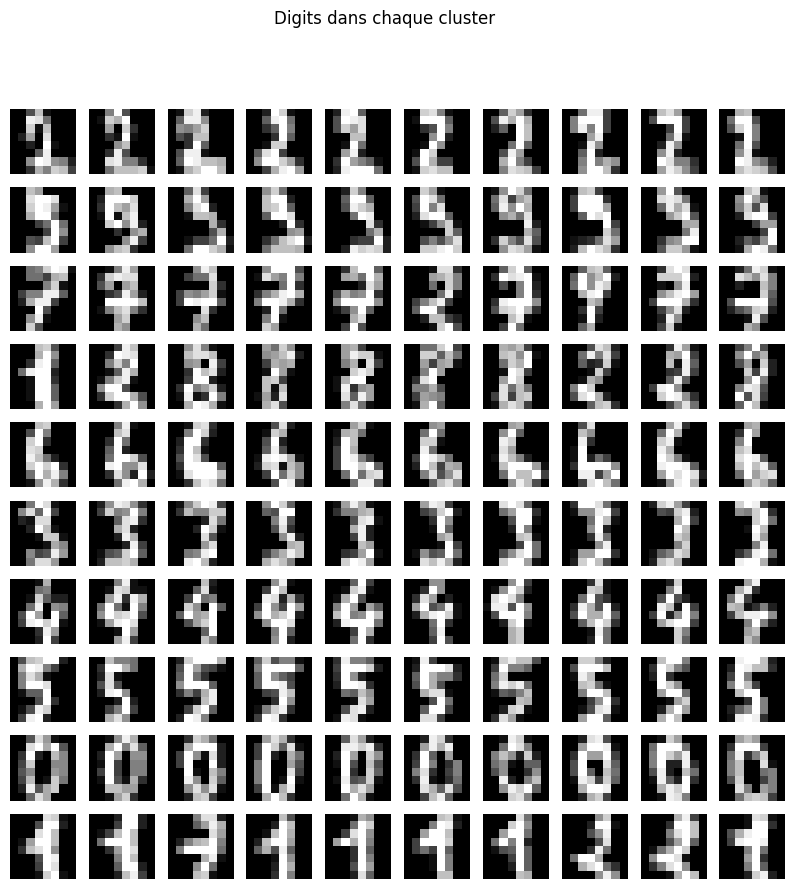

In [264]:
# Afficher les digits pour chaque cluster
fig, axs = plt.subplots(n_clusters, 10, figsize=(10, n_clusters))
fig.suptitle('Digits dans chaque cluster')

for i in range(n_clusters):
    cluster_digits = data[labels == i]
    for j in range(10):
        ax = axs[i, j]
        ax.imshow(cluster_digits[j].reshape(8, 8), cmap='gray')
        ax.axis('off')
plt.show()

# PCA

## Sklean algorithm

[[ -1.25946005  21.27484985  -9.46306649 ...   2.52558219  -0.60498808
    3.66050924]
 [  7.95762205 -20.76870021   4.43943943 ...  -4.63291915   3.57774343
   -1.06287256]
 [  6.99191719  -9.9558613    2.95849412 ... -16.42012478   0.71153105
    4.26683648]
 ...
 [ 10.80128024  -6.96025769   5.59964005 ...  -7.41105937  -3.95925312
  -13.06634179]
 [ -4.87208262  12.42391715 -10.17092325 ...  -4.36368806   3.92882159
  -13.14269786]
 [ -0.34438654   6.36555895  10.7737451  ...   0.68241901  -4.10727518
  -12.57368803]]


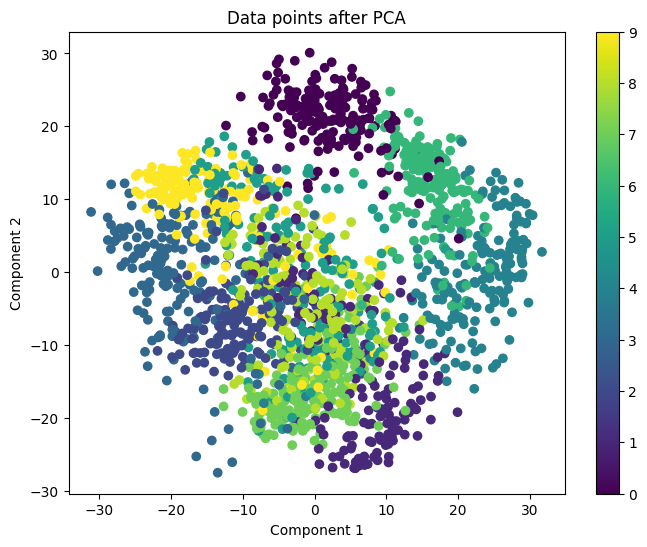

Quality of representation for the first 10 components: 73.82%


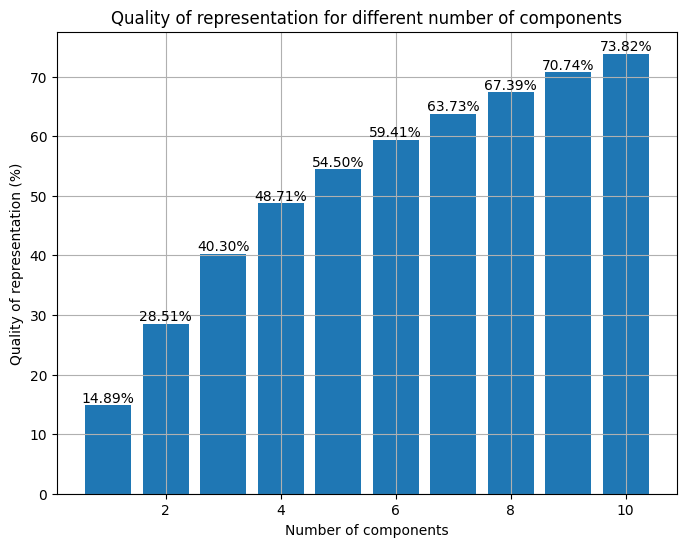

In [265]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# Charger l'ensemble de données MNIST (digits)
digits = load_digits()

# Sélectionner un sous-ensemble d'échantillons pour une exécution plus rapide
data_sl = digits.data

# Réduire la dimensionnalité avec PCA
n_components = 10
pca = PCA(n_components=n_components)
data_pca_sl = pca.fit_transform(data_sl)

def pca_plot(data_pca_sl, pca, n_components, explained_variance_ratio):
    
    print(data_pca_sl)
    
#     # Afficher les résultats de PCA
#     print("PCA explained variance ratio:", pca.explained_variance_ratio_)
#     print("PCA singular values:", pca.singular_values_)

    # Afficher le graphe des points de données après PCA
    plt.figure(figsize=(8, 6))
    plt.scatter(data_pca_sl[:, 0], data_pca_sl[:, 1], c=digits.target, cmap='viridis')
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title("Data points after PCA")
    plt.colorbar()
    plt.show()

    # Calculer le ratio de variance expliquée
#     explained_variance_ratio = pca.explained_variance_ratio_

    # Calculer le ratio cumulatif de variance expliquée
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

    # Calculer la qualité de représentation pour les premiers k composants
    k = n_components
    quality_of_representation = cumulative_variance_ratio[k-1] * 100

    # Afficher la qualité de représentation
    print(f"Quality of representation for the first {k} components: {quality_of_representation:.2f}%")
    
    
    # Calculer le ratio cumulatif de variance expliquée
#     explained_variance_ratio = explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

    # Calculer la qualité de représentation pour différentes valeurs de k
    max_k = n_components
    qualities = [cumulative_variance_ratio[k-1] * 100 for k in range(1, max_k+1)]

    # Afficher la courbe de l'évolution de la qualité de représentation
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, max_k+1), qualities)
    plt.xlabel("Number of components")
    plt.ylabel("Quality of representation (%)")
    plt.title("Quality of representation for different number of components")
    plt.grid(True)

    # Ajouter les étiquettes des valeurs en pourcentage
    for i, qual in enumerate(qualities):
        plt.text(i+1, qual, f"{qual:.2f}%", ha='center', va='bottom')

    plt.show()
    
pca_plot(data_pca_sl, pca, n_components, pca.explained_variance_ratio_)

## PCA Dimension reduction

[[  1.25946645 -21.27488348   9.46305462 ...  -2.55347036   0.58184214
    3.62569695]
 [ -7.9576113   20.76869896  -4.43950604 ...   4.61593641  -3.58745013
   -1.07470456]
 [ -6.99192297   9.95598641  -2.95855808 ...  16.41519983  -0.7192329
    4.25580548]
 ...
 [-10.8012837    6.96025223  -5.59955453 ...   7.4150719    3.96158533
  -13.06509519]
 [  4.87210009 -12.42395362  10.17086635 ...   4.35789156  -3.93924173
  -13.14525475]
 [  0.34438963  -6.36554919 -10.77370849 ...  -0.66902071   4.11316505
  -12.56200443]]


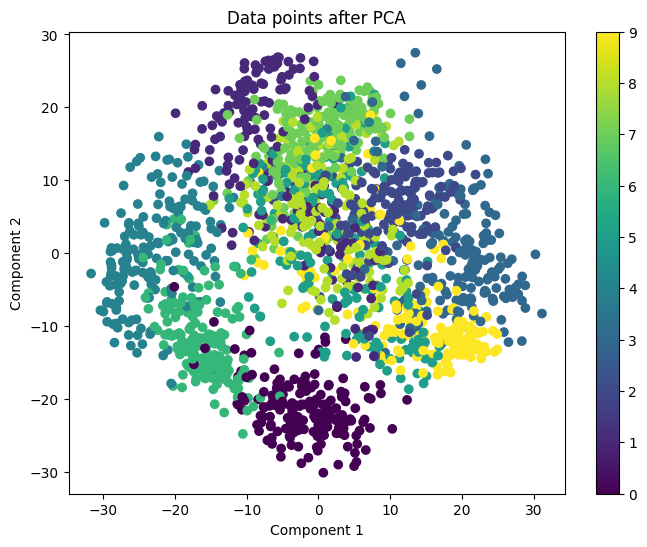

Quality of representation for the first 10 components: 73.82%


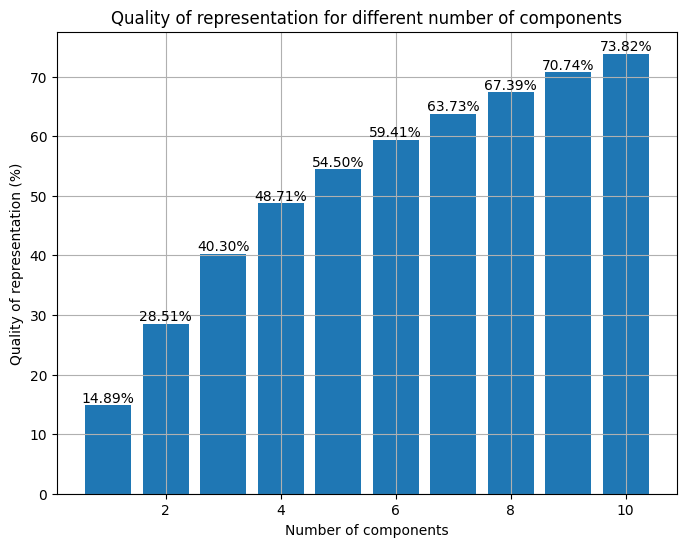

In [266]:
def pca(X, num_components):
    # Centrer les données
    X_meaned = X - np.mean(X, axis=0)
    
    # Calculer la matrice de covariance
    cov_matrix = np.cov(X_meaned, rowvar=False)
    
    # Calculer les valeurs propres et les vecteurs propres
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    # Trier les valeurs propres dans l'ordre décroissant
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    # Sélectionner les composantes principales
    components = sorted_eigenvectors[:, :num_components]
    
    # Projetter les données sur les nouvelles dimensions
    projected_data = np.dot(X_meaned, components)
    
    total_variance = np.sum(sorted_eigenvalues)
    explained_variance_ratio = sorted_eigenvalues / total_variance
    
    return projected_data, explained_variance_ratio

# Exemple d'utilisation
# Créer une matrice de données synthétique 2D
data = np.array(data_sl)

# Appliquer PCA avec 1 composante principale
projected_data, explained_variance_ratio = pca(data, num_components=n_components)
pca_plot(projected_data, None, n_components, explained_variance_ratio)


## PCA Compression/Decompression

In [267]:
import numpy as np

def pca_compress(X, num_components):
    # Centrer les données
    X_meaned = X - np.mean(X, axis=0)
    
    # Calculer la matrice de covariance
    cov_matrix = np.cov(X_meaned, rowvar=False)
    
    # Calculer les valeurs propres et les vecteurs propres
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    # Trier les valeurs propres dans l'ordre décroissant
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    # Sélectionner les composantes principales
    components = sorted_eigenvectors[:, :num_components]
    
    # Projetter les données sur les nouvelles dimensions
    compressed_data = np.dot(X_meaned, components)
    
    # Calculer les données reconstruites
    reconstructed_data = np.dot(compressed_data, components.T) + np.mean(X, axis=0)
    
    return compressed_data, reconstructed_data

# Exemple d'utilisation
# Créer une matrice de données synthétique 2D
data = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])

# Compresser les données avec 1 composante principale
compressed_data, reconstructed_data = pca_compress(data, num_components=1)

print("Données originales :")
print(data)

print("Données compressées :")
print(compressed_data)

print("Données reconstruites :")
print(reconstructed_data)

Données originales :
[[1 2]
 [2 3]
 [3 4]
 [4 5]
 [5 6]]
Données compressées :
[[-2.82842712]
 [-1.41421356]
 [ 0.        ]
 [ 1.41421356]
 [ 2.82842712]]
Données reconstruites :
[[1. 2.]
 [2. 3.]
 [3. 4.]
 [4. 5.]
 [5. 6.]]


### Applied to MNIST

In [268]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Charger l'ensemble de données MNIST (digits)
digits = load_digits()

# Sélectionner un sous-ensemble d'échantillons pour une exécution plus rapide
data = digits.data

#### Original version

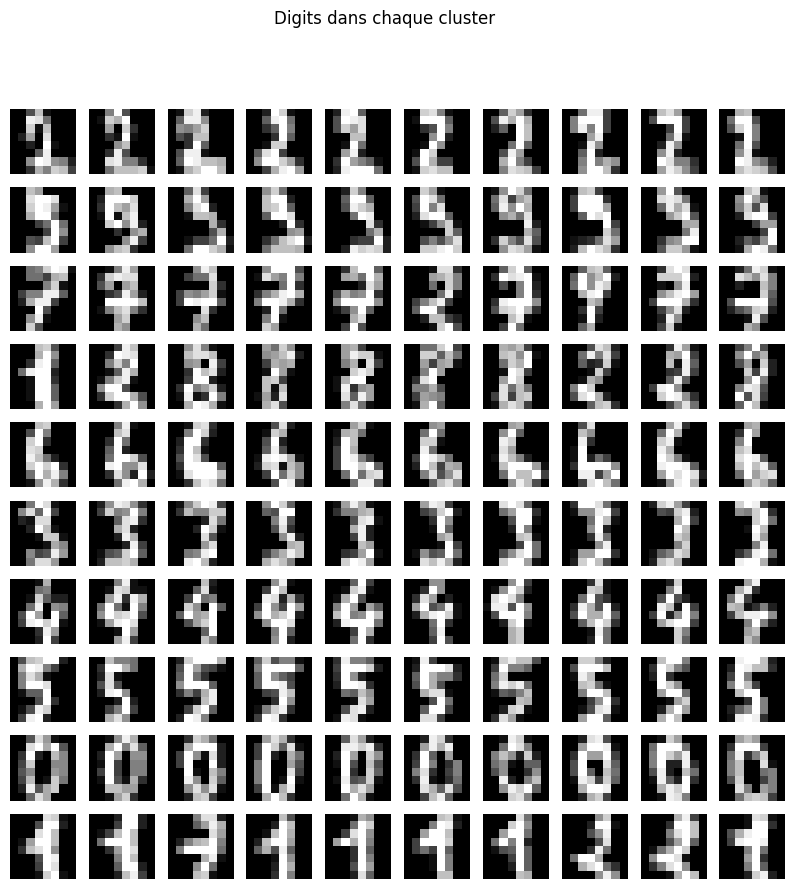

In [269]:
n_clusters = 10

# Afficher les digits pour chaque cluster
fig, axs = plt.subplots(n_clusters, 10, figsize=(10, n_clusters))
fig.suptitle('Digits dans chaque cluster')

for i in range(n_clusters):
    cluster_digits = data[labels == i]
    for j in range(10):
        ax = axs[i, j]
        ax.imshow(cluster_digits[j].reshape(8, 8), cmap='gray')
        ax.axis('off')
plt.show()

#### Compressed/Decompressed version

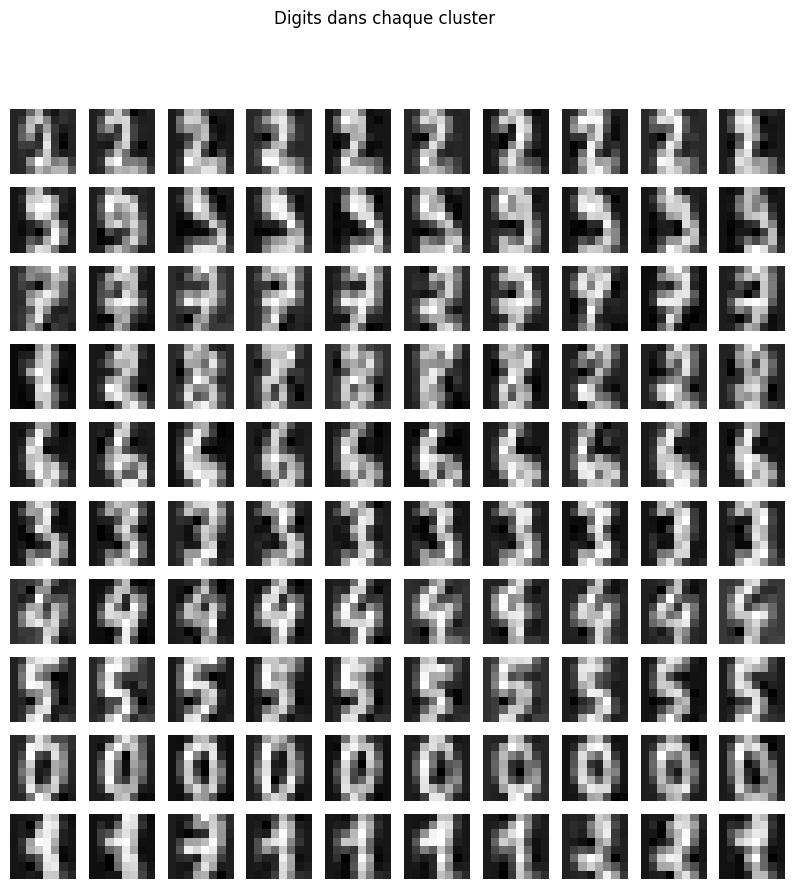

In [270]:
n_clusters = 10
compressed_data, reconstructed_data = pca_compress(np.array(data), num_components=20)

# Afficher les digits pour chaque cluster
fig, axs = plt.subplots(n_clusters, 10, figsize=(10, n_clusters))
fig.suptitle('Digits dans chaque cluster')

for i in range(n_clusters):
    cluster_digits = reconstructed_data[labels == i]
    for j in range(10):
        ax = axs[i, j]
        ax.imshow(cluster_digits[j].reshape(8, 8), cmap='gray')
        ax.axis('off')
plt.show()

## PCA Generation

In [271]:
import numpy as np

def pca_generate(num_samples, components):
    
    # Générer des échantillons aléatoires pour les composantes principales
    random_samples = np.random.randn(num_samples, len(components))
    
    # Calculer les moyennes des composantes principales
    component_means = np.mean(components, axis=0)
    
    # Projeter les échantillons aléatoires sur les composantes principales
    generated_data = np.dot(random_samples, components.T) + component_means
    
    return generated_data

# Exemple d'utilisation
# Créer des composantes principales synthétiques
components = np.array([[1, 2], [2, 3]])

# Générer de nouvelles données avec 5 échantillons
generated_data = pca_generate(5, components)

print("Données générées:")
print(generated_data)


Données générées:
[[ 0.23899858  0.33037488]
 [-0.60154963 -0.43381656]
 [ 3.5413614   6.47177063]
 [ 3.30235567  5.13683321]
 [ 3.47105505  5.22489782]]
